In [1]:
%matplotlib inline
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
from PIL import Image

In [2]:
img=cv.imread('1.jpeg',1)
img1=img.copy()
img1[:,:,0]=img[:,:,2]
img1[:,:,1]=img[:,:,1]
img1[:,:,2]=img[:,:,0]

#PIL.Image.open().convert('RGB')

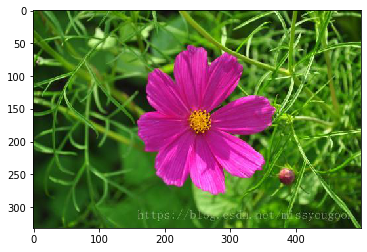

In [3]:
plt.imshow(img1)

## 灰度图均衡

In [4]:
gray=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)

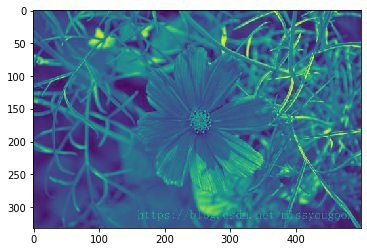

In [5]:
plt.imshow(gray)

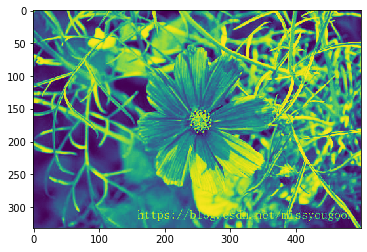

In [6]:
dst=cv.equalizeHist(gray)
plt.imshow(dst)

/Users/xiaonaozhong/anaconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


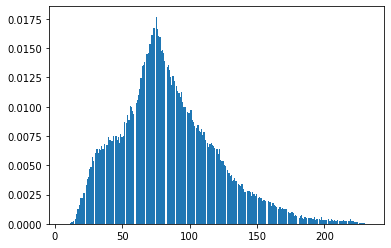

In [7]:
n,bins,patches=plt.hist(gray.flatten(),bins=256,normed=1)
plt.show()

In [8]:
cdf=n.cumsum()
cdf=255*cdf/cdf[-1]
im_new=np.interp(gray.flatten(),bins[:-1],cdf)

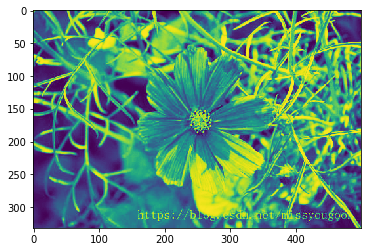

In [9]:
im_new=im_new.reshape(gray.shape)
im_new=Image.fromarray(np.uint8(im_new))
plt.imshow(im_new)

/Users/xiaonaozhong/anaconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


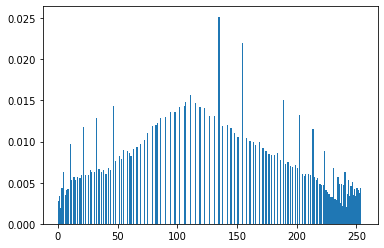

In [10]:
n,bins,patches=plt.hist(np.array(im_new).flatten(),bins=256,normed=1)
plt.show()

## 灰度图正规化

In [11]:
Imax=np.max(gray)
Imin=np.min(gray)
Omax=255
Omin=0

In [12]:
a=float(Omax-Omin)/(Imax-Imin)
b=Omin-a*Imin
new_img=a*gray+b

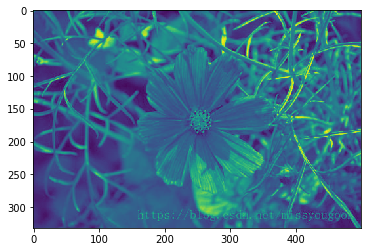

In [13]:
plt.imshow(new_img)

## 彩色图均衡

In [14]:
(b,g,r)=cv.split(img)
bh=cv.equalizeHist(b)
gh=cv.equalizeHist(g)
rh=cv.equalizeHist(r)
result=cv.merge((rh,gh,bh))

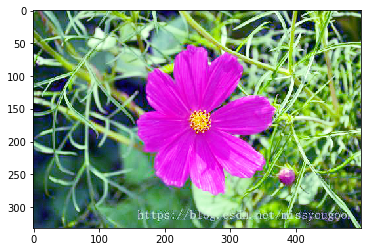

In [15]:
plt.imshow(result)

## AHE

In [16]:
def my_he(input_img):
    n,bins,patches=plt.hist(input_img.flatten(),bins=256,normed=1)
    cdf=n.cumsum()
    cdf=255*cdf/cdf[-1]
    im_new=np.interp(input_img.flatten(),bins[:-1],cdf)
    im_new=im_new.reshape(input_img.shape)
    im_new=Image.fromarray(np.uint8(im_new))
    return im_new
def my_ahe(input_img,w,stride):
    src=input_img
    x,y=src.shape
    src_1=src.copy()
    times_1=(x-w)/stride
    if (x-w)%stride!=0:
        for i in range (stride-(x-w)%stride):
            src_1=np.vstack((src_1,src[-i,:].reshape((1,-1))))  
    src_2=src_1.copy()
    if (y-w)%stride!=0:
        for i in range (stride-(y-w)%stride):
            src_1=np.hstack((src_1,src_2[:,-i].reshape((-1,1))))
    
    new=np.zeros((src_1.shape[0],src_1.shape[1]))
    count=np.zeros((src_1.shape[0],src_1.shape[1]))
    for i in range((x-w)//stride+1):
        for j in range((y-w)//stride+1):
            new[i*stride:i*stride+w,j*stride:j*stride+w]+=my_he(src_1[i*stride:i*stride+w,j*stride:j*stride+w])
            count[i*stride:i*stride+w,j*stride:j*stride+w]+=1
    return new
            

(333, 500)
(333, 1)


/Users/xiaonaozhong/anaconda3/envs/p3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


KeyboardInterrupt: 

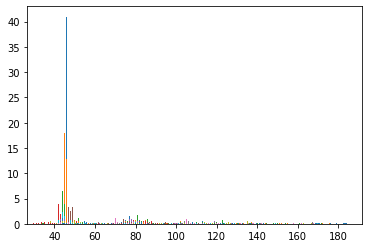

In [24]:
gray_ahe=my_ahe(gray,5,2)

## CLAHE

In [17]:
clahe=cv.createCLAHE(clipLimit=2.0,tileGridSize=(8,8))

In [18]:
gray=clahe.apply(gray)
plt.imshow(gary)

NameError: name 'gary' is not defined